# Stuff for Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os

from tensorflow.keras import datasets, layers, models, optimizers

from ImagingSoftware.ImageProcessing import *
from ImagingSoftware.ImageClassifier import *

import logging
logging.basicConfig(level=logging.INFO)

2023-07-03 09:00:24.384557: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'ImagingSoftware.ImageClassifier'

In [2]:
def make_training_dataset(exposure_time, n_tweezers, n_loops, testing_fraction=0.1):
    path = f"Data/06:23:23/imaging exposure time = {exposure_time}ms/"
    crops = []
    labels = []
    positions = None
    for file in os.listdir(path):
        if file.endswith('.mat'):
            data = loadmat(path + file)
            if positions is None:
                processor = GreenImageProcessor(data['stack'], n_tweezers, n_loops)
                processor.plot()
                positions = processor.tweezer_positions
            else:
                processor = GreenImageProcessor(data['stack'], n_tweezers, n_loops, tweezer_positions=positions)
            file_crops, file_labels = processor.make_dataset()
            crops.append(file_crops)
            labels.append(file_labels)
    crops = np.concatenate(crops, axis=0)
    labels = np.concatenate(labels, axis=0)
    testing_indices = np.random.choice(len(crops), int(len(crops) * testing_fraction), replace=False)
    np.savez_compressed(path + f"{exposure_time}ms training dataset",
                        training_crops=np.delete(crops, testing_indices, axis=0),
                        training_labels=np.delete(labels, testing_indices, axis=0),
                        testing_crops=crops[testing_indices],
                        testing_labels=labels[testing_indices],
                        positions=positions)
    return positions

def make_fidelity_dataset(exposure_time, n_tweezers, n_loops):
    path = f"Data/06:23:23/imaging exposure time = {exposure_time}ms/"
    crops = []
    positions = None
    for file in os.listdir(path):
        if file.endswith('.mat'):
            data = loadmat(path + file)
            if positions is None:
                processor = GreenImageProcessor(data['stack'], n_tweezers, n_loops)
                positions = processor.tweezer_positions
            else:
                processor = GreenImageProcessor(data['stack'], n_tweezers, n_loops, tweezer_positions=positions)
            crops.append(processor.crop_tweezer(3))
    crops = np.concatenate(crops, axis=0)
    np.savez_compressed(path + f"{exposure_time}ms fidelity analysis dataset", crops=crops)
    return crops


def load_training_dataset(exposure_time):
    path = f"Data/06:23:23/imaging exposure time = {exposure_time}ms/"
    return np.load(path + f"{exposure_time}ms training dataset.npz", allow_pickle=True)

def load_fidelity_dataset(exposure_time):
    path = f"Data/06:23:23/imaging exposure time = {exposure_time}ms/"
    return np.load(path + f"{exposure_time}ms fidelity analysis dataset.npz", allow_pickle=True)

In [3]:
def architecture_0(input_shape, n_filters, filter_size):
    network = models.Sequential()
    network.add(layers.Input(shape=(*input_shape, 1)))
    network.add(layers.Conv2D(n_filters, filter_size, strides=1, activation='relu'))
    network.add(layers.MaxPooling2D(pool_size=(2, 2)))
    network.add(layers.Flatten())
    network.add(layers.Dense(2, activation='sigmoid'))
    return network

def architecture_1(input_shape, n_filters, filter_size):
    network = models.Sequential()
    network.add(layers.Input(shape=(*input_shape, 1)))
    network.add(layers.Conv2D(n_filters[0], filter_size[0], strides=1, activation='relu'))
    network.add(layers.Conv2D(n_filters[1], filter_size[1], strides=1, activation='relu'))
    network.add(layers.Flatten())
    network.add(layers.Dense(2, activation='sigmoid'))
    return network   

def architecture_2(input_shape, n_filters, filter_size):
    network = models.Sequential()
    network.add(layers.Input(shape=(*input_shape, 1)))
    network.add(layers.Conv2D(n_filters[0], filter_size[0], strides=1, activation='relu'))
    network.add(layers.MaxPooling2D(pool_size=(2, 2)))
    network.add(layers.Conv2D(n_filters[1], filter_size[1], strides=1, activation='relu'))
    network.add(layers.Flatten())
    network.add(layers.Dense(2, activation='sigmoid'))
    return network

def architecture_3(input_shape, n_filters, filter_size):
    network = models.Sequential()
    network.add(layers.Input(shape=(*input_shape, 1)))
    network.add(layers.Conv2D(n_filters[0], filter_size[0], strides=1, activation='relu'))
    network.add(layers.MaxPooling2D(pool_size=(2, 2)))
    network.add(layers.Conv2D(n_filters[1], filter_size[1], strides=1, activation='relu'))
    network.add(layers.Flatten())
    network.add(layers.Dense(9, activation='sigmoid'))
    network.add(layers.Dense(2, activation='sigmoid'))
    return network

# Make a File of Training/Testing Data


In [5]:
exposure_time = 15
n_tweezers = 100
n_loops = 20
path = f"Data/06:23:23/imaging exposure time = {exposure_time}ms/"
#positions = make_training_dataset(exposure_time, n_tweezers, n_loops)
#make_fidelity_dataset(exposure_time, n_tweezers, n_loops)


# Load a File of Testing/Training Data

In [12]:
#training_data = load_training_dataset(exposure_time)
fidelity_data = load_fidelity_dataset(exposure_time)
#print(training_data['training_labels'].shape)
#print(training_data['testing_labels'].shape)
#positions = training_data['positions']

# Test Model Fidelities

In [6]:
model = models.load_model(path + 'model1.h5')
#classifier = ImageClassifier(model)
#classifier.evaluate(training_data['testing_crops'], training_data['testing_labels'])

128625/128625 [==============================] - 156s 1ms/step


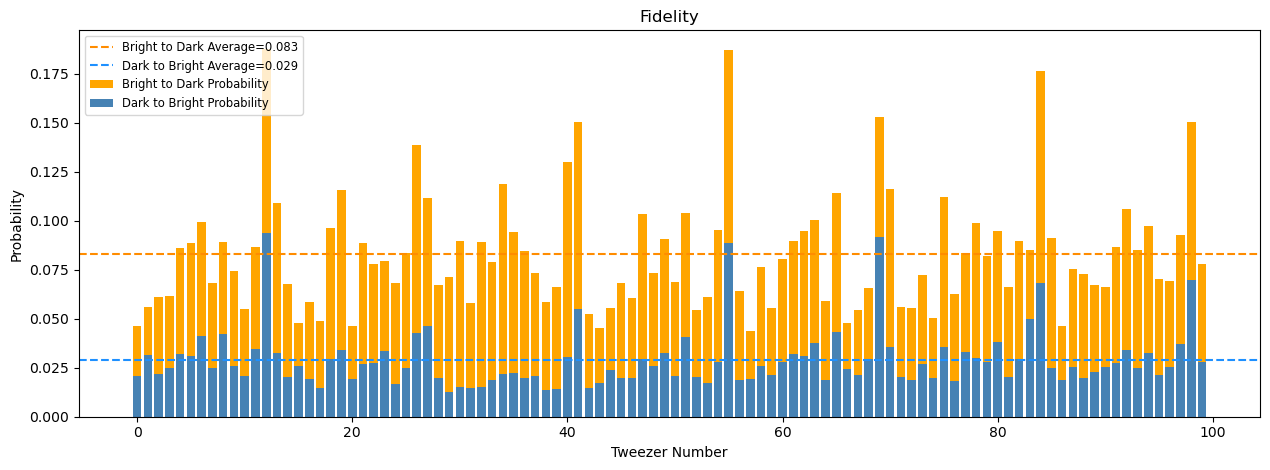

(array([0.02062903, 0.03136692, 0.02184913, 0.02468339, 0.0320596 ,
        0.03110369, 0.04111515, 0.02503311, 0.0420891 , 0.02607613,
        0.02068045, 0.0346266 , 0.09384901, 0.03270674, 0.0202255 ,
        0.02602996, 0.01949412, 0.01447137, 0.02966653, 0.03380264,
        0.01934687, 0.02668646, 0.02731058, 0.03361635, 0.01658075,
        0.02492369, 0.04291709, 0.04603098, 0.01983118, 0.01249144,
        0.01514335, 0.01487679, 0.01500779, 0.01897841, 0.02172665,
        0.02216963, 0.01983486, 0.0208547 , 0.01365615, 0.01436409,
        0.03045548, 0.05500813, 0.01481436, 0.01698464, 0.02397118,
        0.01957972, 0.0196613 , 0.02933209, 0.02603585, 0.03256857,
        0.0207249 , 0.04056884, 0.02031896, 0.01710355, 0.02779695,
        0.08846456, 0.01848498, 0.01905192, 0.02609121, 0.02110536,
        0.02772426, 0.03213698, 0.03080089, 0.03756291, 0.01869784,
        0.04319293, 0.02453203, 0.02111847, 0.02927257, 0.09186566,
        0.03580376, 0.02035699, 0.01878678, 0.02

In [14]:
classifier.get_fidelity(fidelity_data['crops'], n_tweezers, n_loops, plot=True)

# Thresholding Stuff

In [5]:
import sys, os, glob
import warnings
import numpy as np
from tqdm.notebook import tqdm

import matplotlib
import matplotlib.pyplot as plt

import scipy as sp
from scipy.optimize import curve_fit
warnings.filterwarnings("ignore")
import pandas as pd
from analysis_thompsonlab_amo import *
#Setting the default style of our plots.

plt.style.use('seaborn-muted')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.autolayout'] = True
matplotlib.rcParams['figure.figsize'] = (5.5, 4)
matplotlib.rcParams['legend.fontsize'] = 'small'
matplotlib.rcParams['legend.title_fontsize'] = 'small'
matplotlib.rcParams['legend.loc'] = 'best'
plotOptions={'marker':'o', 'linestyle':'-', 'linewidth':0.5, 'alpha':0.8, 'elinewidth':2}

In [6]:
relpath = f"Data/06:23:23/imaging exposure time = {exposure_time}ms/"
prefix = "/Users/jackmango/Desktop/QUIRP - Work/Princeton"
data = dataset(relpath, prefix)

In [7]:
%matplotlib inline
data.addDir(relpath, prefix)
includefn = lambda f: True # if f.params['imagingDetuning0_MHz'] == -0.55 else False
dhist = measurement(data, ['all'], includefn=includefn)

nTweezers = 100
histy = weighted_histogram_556(dhist.files, positions=positions.astype(int), rAtom=2, exclude1st = True, nLoops = 20)

In [8]:
#positions = histy.findPositions(plot=True)

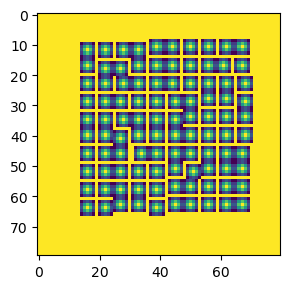

R2 = 0.990 at site 15
R2 = 0.985 at site 47
Threshold too low at site 85
R2 = 0.937 at site 85


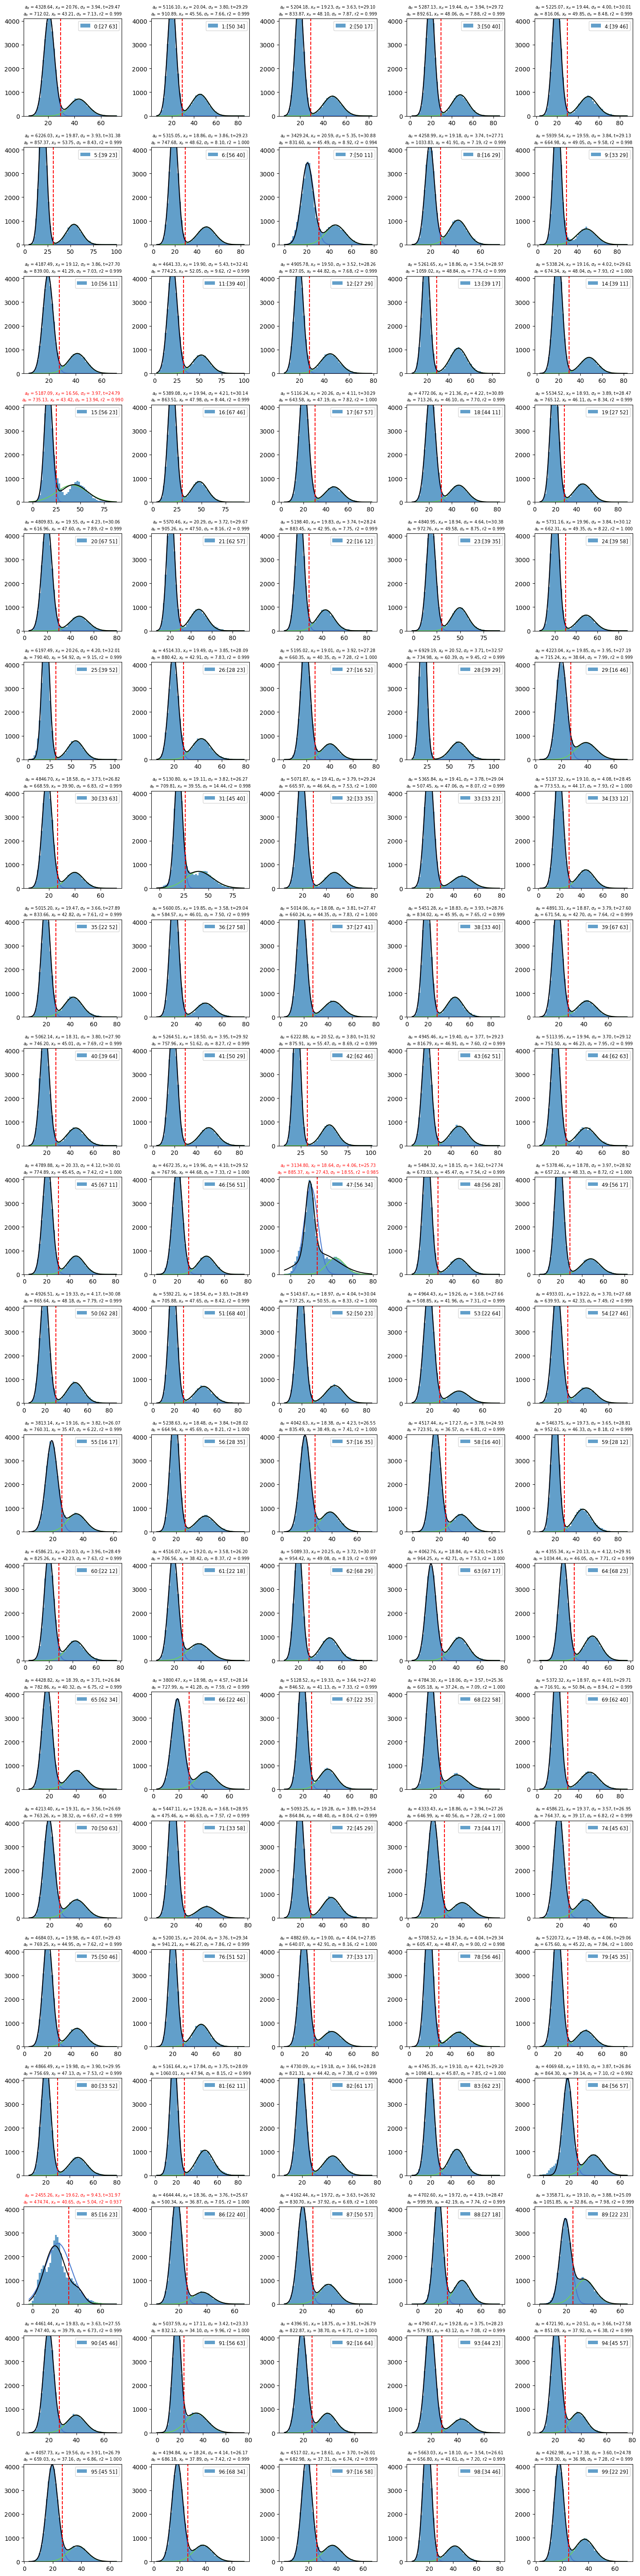

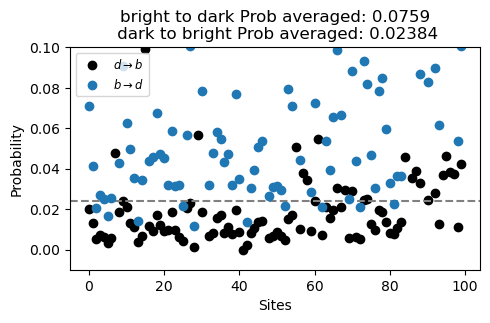

In [9]:
histy.calculateWeights(bgExcludeRegion = [[10,5],[73,75]])

fitParams = [5 for _ in range(nTweezers)]
histy.applyWeights(weights=True, fitParams=fitParams)

histy.thresholds[41]= 10000

probs = histy.fidelityAnalysis(plot=True)

In [16]:
import numpy as np
exp_time = [15, 20, 25, 30]
avg_pbd = np.array([
    [0.0759, 0.04564, 0.02765, 0.01701], [0.083, 0.0275, 0.0157, 0.0134], [0.0727, 0.0274, 0.0176, 0.0127]
])
avg_pdb = np.array([
    [0.02384, 0.01291, 0.00572, 0.00156], [0.0290, 0.00906, 0.00505, 0.00492], [0.0727, 0.00907, 0.0056, 0.00472]
])

Text(0, 0.5, 'Probability')

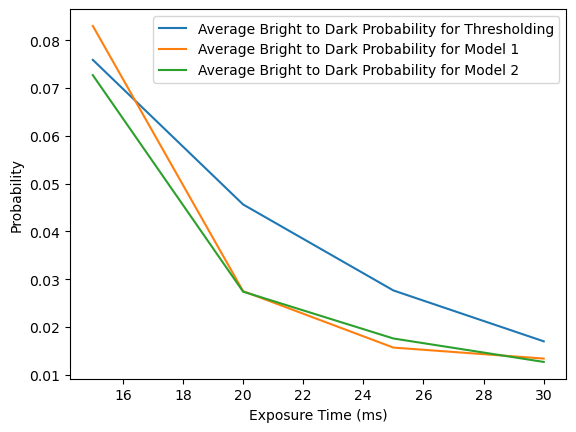

In [17]:
plt.plot(exp_time, avg_pbd[0], label="Average Bright to Dark Probability for Thresholding")
plt.plot(exp_time, avg_pbd[1], label="Average Bright to Dark Probability for Model 1")
plt.plot(exp_time, avg_pbd[2], label="Average Bright to Dark Probability for Model 2")

plt.legend()
plt.xlabel("Exposure Time (ms)")
plt.ylabel("Probability")

Text(0, 0.5, 'Probability')

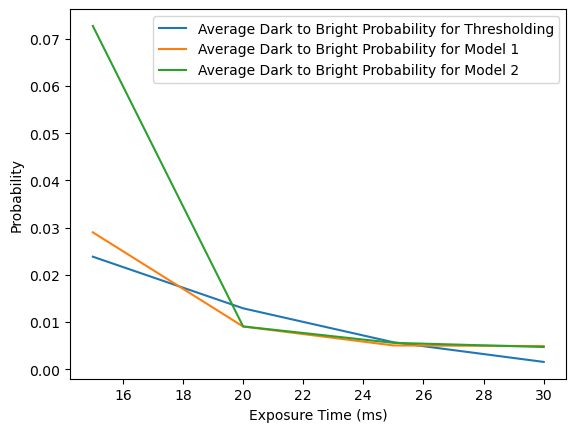

In [18]:
plt.plot(exp_time, avg_pdb[0], label="Average Dark to Bright Probability for Thresholding")
plt.plot(exp_time, avg_pdb[1], label="Average Dark to Bright Probability for Model 1")
plt.plot(exp_time, avg_pdb[2], label="Average Dark to Bright Probability for Model 2")

plt.legend()
plt.xlabel("Exposure Time (ms)")
plt.ylabel("Probability")

TypeError: Invalid shape (3, 10, 10) for image data

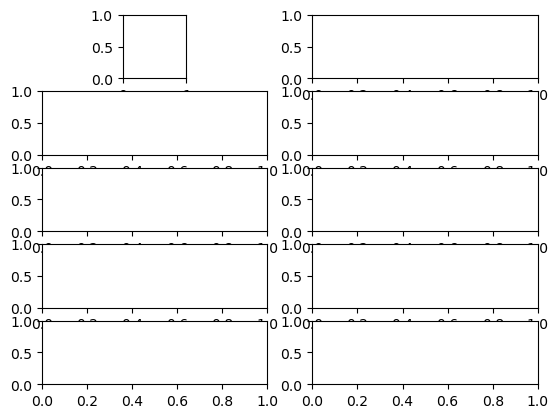

In [12]:
kernels = model.layers[1]
fig, axs = plt.subplots(5, 2)


for i in range(5):
    for j in range(2):
        axs[i][j].imshow(kernels.kernel[i + j])